In [86]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [87]:
data = datasets.load_iris()

In [88]:
X=np.array(data.data)
y=np.array(data.target)
X=np.delete(X, np.array([1,2]), axis = 1)


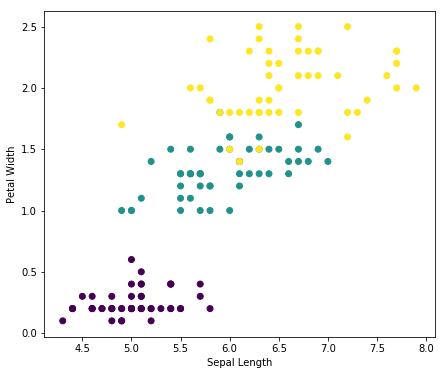

In [89]:
plt.figure(figsize=(7,6))
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.show()

In [90]:
km = KMeans(n_clusters=3)

In [91]:
km.fit(X,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [92]:
y_ = km.predict(X)

In [96]:
km_obj=km.inertia_
km_obj

32.726526159026164

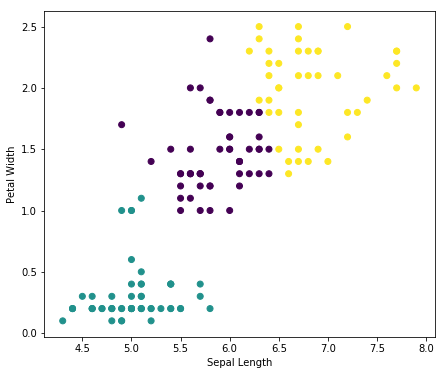

In [97]:
plt.figure(figsize=(7,6))
plt.scatter(X[:,0],X[:,1],c=y_)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.show()

## Random Sampling

In [98]:
data_ = np.insert(X, axis=1,obj=len(X[0]), values=y)

In [99]:
data_[:10]

array([[5.1, 0.2, 0. ],
       [4.9, 0.2, 0. ],
       [4.7, 0.2, 0. ],
       [4.6, 0.2, 0. ],
       [5. , 0.2, 0. ],
       [5.4, 0.4, 0. ],
       [4.6, 0.3, 0. ],
       [5. , 0.2, 0. ],
       [4.4, 0.2, 0. ],
       [4.9, 0.1, 0. ]])

In [100]:
def k_means_objective(X, centres):
    obj = 0
    for point in X:
        if point not in centres:
            distance = [sum((point-i)**2) for i in centres]
            obj += min(distance)
    return obj

In [102]:
def random_sampling(X,y, n_sampleratio=0.7, seed=0):
    data_ = np.insert(X, axis=1,obj=len(X[0]), values=y)
    np.random.seed(seed)
    np.random.shuffle(data_)
    sample_data = data_[0:int(len(data_)*n_sampleratio)]
    return sample_data[:,:-1], sample_data[:,-1]
def random_sampling1(X,y, n=0.7, seed=0):
    data_ = np.insert(X, axis=1,obj=len(X[0]), values=y)
    np.random.seed(seed)
    sampling_idx = np.random.randint(0,len(X),size=int(n*len(X)))
    new_data = []
    for i in sampling_idx:
        new_data.append(data_[i])
    new_data=np.array(new_data)
    return new_data[:,:-1], new_data[:,-1]

In [103]:
X_,y_ = random_sampling(X,y)

In [104]:
X__,y__ = random_sampling1(X,y)

In [105]:
for i in [X_,X__,y_,y__]:
    print(i.shape)

(105, 2)
(105, 2)
(105,)
(105,)


In [106]:
km1 = KMeans(n_clusters=3)
km1.fit(X_,y_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [107]:
random_sample_centres = km1.cluster_centers_

In [108]:
score = k_means_objective(X,random_sample_centres)/km_obj

In [109]:
score

1.010312591642149

In [110]:
km1.fit(X__,y__)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [111]:
k_means_objective(X, km1.cluster_centers_)/km_obj

1.0224544472913304